## CS 237 Homework 01 Solution -- Data Display in Python

### Due Thursday at Midnight in Gradescope (with grace period of 6 hours)

In this first homework, you will become familiar with various methods of displaying the results of probability experiments graphically in Python using Jupyter notebooks and Matplotlib. This will be a fundamental way of understand the results of experiments throughout the course. We will cover:

  - Basic introduction to Python and Jupyter Notebook.
  - Basic introduction to Matplotlib and graphing
  - Basic introduction to Monte Carlo (probability) simulation. 

To submit,  Run All before making your PDF version, be careful when you scan it (I recommend , and check to make sure that each page
is visible in Gradescope. We will allow you to resubmit to Gradescope if you make
mistakes in scanning and uploading for HW 01; thereafter any solutions we can not read or access will be marked wrong. 

# Anaconda Distribution of Python 
- Download from https://www.continuum.io/downloads
    - Make sure it's Python 3! 
    - Be sure to pick the correct Operating System (i.e., Windows, MAC OS, Linux)

# Starting Jupyter 
- Open a Terminal Window 
    - For MAC OS, open your Applications folder, then open the Utilities folder. Open the Terminal application. (Or, type "terminal" into Spotlight.) You may want to add this to your dock.
    - For Windows, simply search for CMD and run the result
- In the terminal run $\texttt{jupyter notebook}$
- This will bring you to the home page. 
- Click new and then click python3 to create a new Ipython3 notebook.
    - Alternatively, use the Anaconda Navigator that will be installed in your Applications folder.  


In [2]:
# Here are some imports which will be used in the code in the rest of the lab  

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting


from numpy.random import seed, randint, random
from collections import Counter

# NOTE: You may not use any other libraries than those listed here without explicit permission.

# Plotting Points

The <code>scatter(...)</code> function is used to plot points from a list of x values and the associated y values. 


This is the list of points: [(1, 2), (2, 3), (3, 6), (4, 8)]
They must be input to the function as separate lists:
	X = [1, 2, 3, 4]
	Y = [2, 3, 6, 8] 



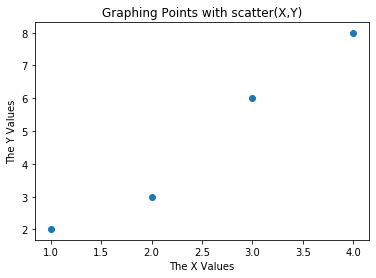

In [3]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
X = [1,2,3,4]
Y = [2,3,6,8]

print("\nThis is the list of points:",list(zip(X,Y)))
print("They must be input to the function as separate lists:")
print("\tX =",X)
print("\tY =",Y,"\n")
plt.scatter(X,Y)
plt.title('Graphing Points with scatter(X,Y)')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()



# Plotting Lines and Curves

If you call <code>plot(...)</code> instead of <code>scatter(...)</code> you will display a curve created by connecting the points with straight lines. Essentially you can only plot straight lines between points, but if the points are close together, you will not notice, and it will look like a smooth curve. 

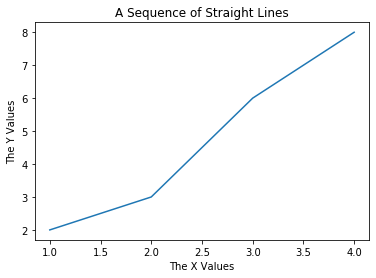

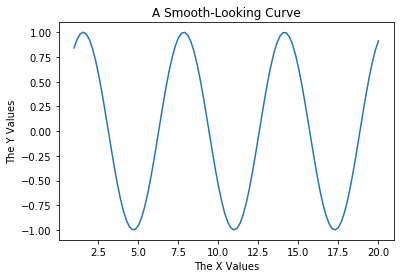

In [4]:
# To plot a curve through the points (1,2), (2,3), (3,6), (4,8) we would use: 
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Sequence of Straight Lines')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to do both, you can simply call both functions before you call show(). 

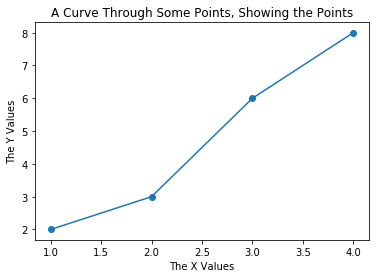

In [5]:
plt.scatter([1,2,3,4], [2,3,6,8])
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Curve Through Some Points, Showing the Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to draw a single line from $(x_1,y_1)$ to $(x_2,y_2)$ you can plot $[x_1,x_2]$ and $[y_1,y_2].$

Here we have added a zero line to our sin curve:

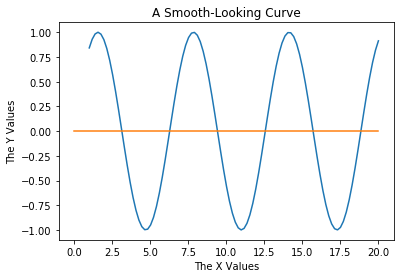

In [6]:
X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.plot([0,20],[0,0])
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

### For further details on drawing plots, particularly on color and format, see the Appendix at the end of this document

# Problem Zero: Using the Numpy Random Library

We have imported a number of functions from the Numpy Random library, which you can read 
about <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html">here</a>. 

In [7]:
# Run this cell several times and and see what happens

random()

0.37857515016081655

In [8]:
# Run this cell several times and and see what happens
# List comprehensions are your best friend, learn how to use them!!!

size = 10
rands = [ random() for k in range(size) ]
rands

[0.12532354978320437,
 0.06755360247330744,
 0.19657321789763615,
 0.18957583356126784,
 0.2857757365631496,
 0.5395075502400023,
 0.20608717253496012,
 0.3211264104535769,
 0.6229014746890272,
 0.9615333626895559]

In [9]:
# Run this cell several times and and see what happens
# This produces a Numpy 1D vector, which is
# another way to store a sequence.

size = 5
random(size)

array([0.35877349, 0.28988436, 0.42654649, 0.75714817, 0.06614819])

In [10]:
# In most cases, arrays are interchangeable with lists, but if you need a Python 
# list, just do this:

list(random(size))

[0.04481318711521998,
 0.4501140503901617,
 0.16108573109840563,
 0.7508167328854514,
 0.4824894313243092]

In order to make grading easier, we will "seed" the random number generation so that it always produces the same pseudo-random sequence. However, you should generally try running your code several times without the seed, trying it on various random sequences. 

Just be sure to include the seed before running your program to submit, so that the graders can see your correct results. 


In [11]:
# Run this cell several times, and see what happens
# How is it different from the result in cell [210]?

seed(0)
random(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

# Problem 1 (Plotting Points)

## Part A

One of our standard examples in lecture will be a "spinner" which can be set in motion to
randomly chose a real number in the half-open interval [0..1): 

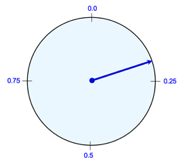


We will simulate this using the Python function <code>random()</code> from the Numpy.random library we imported above.


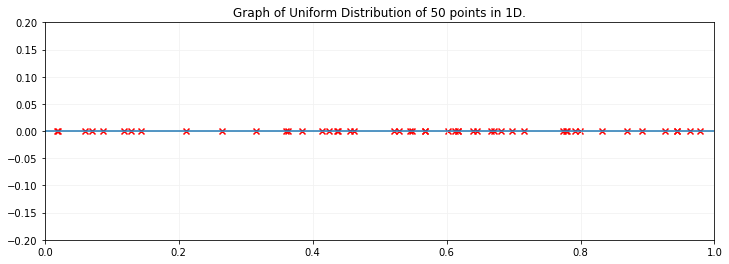

In [12]:
#     Use numpy's random() function to build a list of x_vals with the following properties: 
#          - x_vals list should have length num_trials
#          - Each value in x_vals should be a random float in the range [0..1)
#     Now plot the points (xi,0) along the x axis in the diagram below


def random_line_plot(num_trials):
    x_vals =  [ random() for k in range(num_trials) ]    # <---  Your code here
    y_vals =  [ 0 for k in range(num_trials) ]           # <---  Your code here
    plt.figure(figsize=(12, 4))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 1D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(-0.2, 0.2)
    plt.xlim(-0.0,1.0)
    plt.plot([0,1.0],[0,0])
    plt.scatter(x_vals, y_vals, marker="x",color="r")
    plt.show()

# TO DO:  Complete the lines of code indicated above. Then comment out the <code>seed(0)</code> 
# statement and run this cell several times to see the distribution of points;
# put the seed command back in before you submit!

seed(0)
random_line_plot(50)

## Part B

Now we will simulate the experiment of throwing a dart at a unit square, which will produce a scatter plot of random points in a 2D grid. 



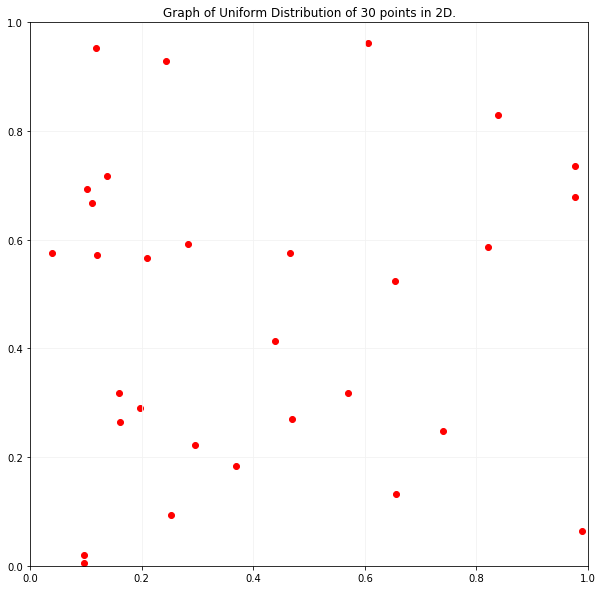

In [13]:
# TO DO:  Complete the following function stub which will produce a scatter plot of 
#         random points in a unit square. 

def random_plane_plot(num_trials):
    """Uses numpy's random function to build a list of x and y values with the following properties: 
    - x_vals should have len num_trials
    - y_vals should have len num_trials
    - Each value in x and y should be between 0 and 1 
    HINT: use the same code to build x_vals and y_vals
    """
    x_vals = [ random() for k in range(num_trials) ]              # Your code here
    y_vals = [ random() for k in range(num_trials) ]              # Your code here
    plt.figure(num=None, figsize=(10, 10))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 2D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(0, 1)
    plt.xlim(0,1)
    plt.scatter(x_vals, y_vals,marker="o",color="r")
    plt.show()

    
# Comment out the next line and run this cell several times to see the distribution of points;
# put the seed command back in before you submit!

#seed(0)
random_plane_plot(30)

### [End of Problem One]

# Bar Charts

If we do the exact same thing as we did with a simple plot, but use the function <code>bar(...)</code> we get a bar chart:

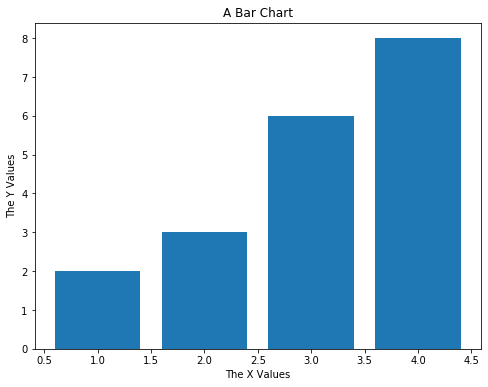

In [42]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
plt.figure(figsize=(8, 6))
plt.bar([1,2,3,4], [2,3,6,8])
plt.title('A Bar Chart')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If the Y axis is probabilities (in the range 0 .. 1), we get a distribution of the probabilities among the outcomes of an experiment:

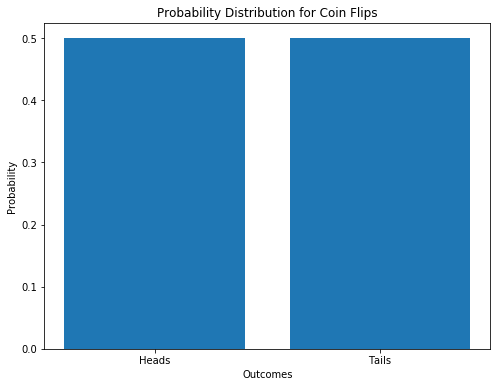

In [15]:
# Show the distribution of probabilities for a coin flip:
x = [0,1]
y = [0.5, 0.5]
labels = ['Heads', 'Tails']

plt.figure(num=None, figsize=(8, 6))
plt.xticks(x, labels)
plt.bar(x,y)
plt.title('Probability Distribution for Coin Flips')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

With a few tweaks, you can create an attractive bar chart for arbitrary probability distributions:

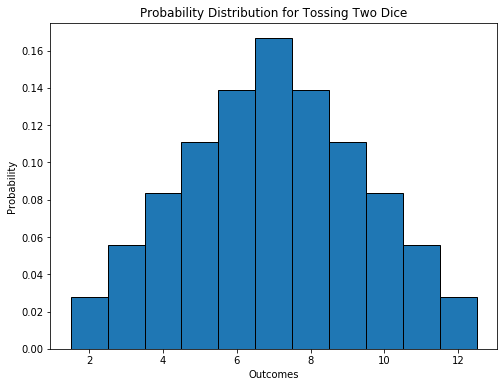

In [16]:
# Show the distribution of probabilities for flipping two dice
x = [k for k in range(2,13)]
y = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

plt.figure(num=None, figsize=(8, 6))
plt.bar(x,y, width=1.0,edgecolor='black')
plt.title('Probability Distribution for Tossing Two Dice')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

# Histograms
- If you give a list of values to <code>hist(...)</code> it will create a histogram counting how many of each value occur; this list can be unordered;
- You will get a cleaner display if you specify where the edges of the bins are, and make sure the edges of the bins are visible, as shown in this example:

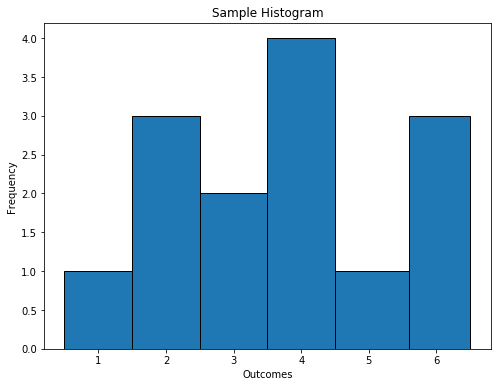

In [17]:
plt.figure(num=None, figsize=(8, 6))
plt.hist([1,2,4,2,6,2,4,5,6,4,6,3,4,3],bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

# Problem 2 
Read and understand the function <code>dieRoll(num_trials)</code> below, which simulates the experiment of rolling a fair, six-sided die <code>num_trials</code> times. 
- The sample space is $\{1,2,3,4,5,6\}$. 
- The experiment is equi-probable, i.e., the probability of any particular outcome is $\frac{1}{6}$.
- If we record the outcome for a large number of experiments, we would expect the number of outcomes to be "evenly distributed." In other words, for a large number of trials, we would expect the probability of each outcome $k\in \{1,2,3,4,5,6\}$ to be

$$\frac{\text{number of times we observed a value } k}{\texttt{num_trials}} \approx \frac{1}{6}$$ 

TO DO: For this first problem, simply provide the single line of Python code which would display a histogram of the results of the experiment for 10000 trials with appropriate labels.  You should use the Numpy function <code>randint(...)</code>, as shown in the next cell.

In [18]:
# Demo of randint(lo,hi), which generates a random integer from the sequence
# [lo,lo+1,...,hi-1].  

# In other words the upper bound is exclusive, to be consistent with the indices in lists,
# the Python range function, and so on. 

randint(0,4)

2

In [19]:
# You can also ask it for an array, since it is a Numpy function:

randint(0,4,10)

array([0, 0, 3, 1, 3, 0, 2, 1, 1, 1])

In [20]:
# Ok, your turn!

seed(0)

def roll_die(num_trials = 100000):
    """
    - Simulates rolling a fair die num_trials times, i.e., a number is selected from 
    - (1,2,3,4,5,6) with equal probability num_trials times. By default, num_trials is set to 100000
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument for randint determines the shape and size of the result array. In this case, we only need
    - a one dimensional array (a list)
    """
    trials_and_results = randint(1,7,num_trials) # this creates a 1D array of length num_trials of random integers 1..6
    return trials_and_results

example_trials = roll_die()

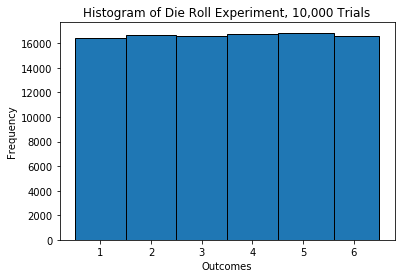

In [21]:
# Solution: 

plt.hist(example_trials,bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Histogram of Die Roll Experiment, 10,000 Trials')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()


# Problem 3 

Now we will display the same results showing the distribution of probabilities, instead of an explicit histogram.
You will use the funtion <code>bar(...)</code> demonstrated above. 
- To calculate the probabilities, you will need to count the number of occurrences of each of the outcomes, you may find the function <code>Counter(...)</code> useful for this (Google "Numpy Counter" to find out how this works, hw00 has examples of how to use this); 
- Once you have the frequency of each outcome, divide by the total number of trials to get the probability for each.

TO DO:  Complete the function stub below which takes the list returned by <code>roll_die(...)</code>, or any other experiment returning numerical results, and produces a frequency distribution; this should have the same shape as the histogram, but the Y axis will be probabilities instead of the frequency. Again, create appropriate labels. Demonstrate your function, again, on the list <code>example_trials</code> produced in Problem 1. 

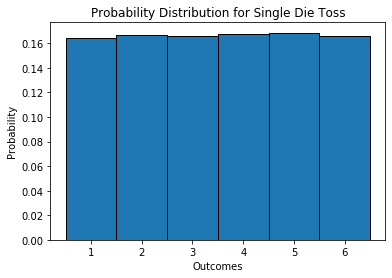

In [22]:
seed(0)

# Solution 
def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()


show_distribution(example_trials,title='Probability Distribution for Single Die Toss')
  

# Motivation for Monte Carlo simulation
For the case of a fair die, the distribution is very easily computed. In general, it is very difficult to write down a closed form solution for the distribution of real world events. This is where simulation comes into play-- instead of  mathematically computing the distribution explicitly, you can use this method of repeating experiments, and recording outcomes to understand the probabilistic rules governing some real world event. When you can come up with an analytical result, this is a nice way of confirming its correctness!

# Problem 4
You will now do the same thing you did in the previous problems, but with a new experiment: instead of rolling one die and recording the value, you will simulate rolling $n$ dies and recording their sum. For example, if $n=2$ and  the first die shows up as a 3, and the second die shows up as a 1, the sum (and the value we record) would be 4. 

TO DO:  Complete the two function stubs below and then demonstrate by providing the single line of code which would print out the probability distribution for rolling 2 dice 100,000 times. 

Hint: Not required, but think about how you might do this in one line using Numpy and list comprehensions. 

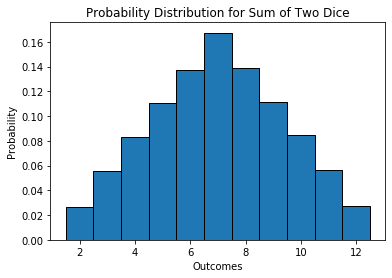

In [23]:
seed(0)
    
# Solution
def roll_and_add_dice(num_dice, num_trials = 10**5):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array (a list)
    """
    trials_and_results = randint(1,7,(num_dice, num_trials))
    acum =  np.zeros(num_trials)
    for i in range(len(trials_and_results)):
        acum += trials_and_results[i]
    return acum
    

show_distribution(roll_and_add_dice(2),title='Probability Distribution for Sum of Two Dice')

# Here's another way to do it, showing the power of list comprehensions with numpy! 
# A one-line solution!

def roll_and_add_dice(num_dice, num_trials = 10000):
    return [ sum(randint(1,7,[num_dice])) for k in range(num_trials) ]



# Problem 5 (Monte Carlo Calculation of $\pi$)

This final problem is also a Monte Carlo simulation, but this time in
the continuous domain: we will calculate the value of $\pi$ using
a variation of Problem 1B. 

We will leave this one up to you as it the exact details, but you must
use the following fact: a circle inscribed in a unit square (i.e., with
side of length and area 1.0):

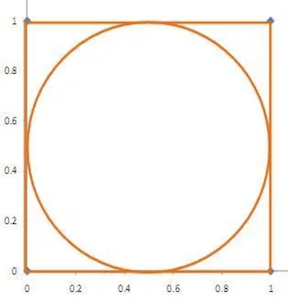

has as radius of 0.5 and an area of $\pi\ast (0.5^2) = \frac{\pi}{4}.$

Therefore, if you generate <code>num_trials</code> random points in the unit square, as in Problem 1B,
and count how many land inside the circle, you can calculate an approximation of $\pi$. 

For this problem, you must
<blockquote>

  (A) Draw the diagram of the unit square with inscribed circle; 
  
  (B) Draw 500 random points, and calculate the value of $\pi$;  
  
  (B) With or without drawing the diagram, calculate the value of $\pi$ you would get
    from $10^5$ trials. 
    
  (C) After completing (B), try to get a more accurate value for $\pi$ by increasing the number of trials. Your results will depend on your machine, but for comparison, with my new Macbook Pro, I ran it with $10^8$ trials while I got a cup of coffee, and it had the answer correct to 3 decimal places. Sometimes I have run big experiments overnight!   
  
</blockquote>    
Hint: Start by copying your code from Problem 1B. You might find Mr. Pythagoras's formula useful.  
To draw the inscribed circle, consider the code from "A Smooth-Looking Curve" at the top of
this notebook: create a sequence of values (representing the angle theta in radians):
<blockquote>
    <code>thetas = np.linspace(0, 2*np.pi, 100)</code>
</blockquote>
 Then to create the x and y values for the points around the circle, you can use
 the np.sin(...) and np.cos(...) functions, following the typical diagram 
 about unit circles and trig functions:
 
 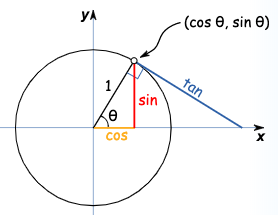
 
 
 (see https://www.mathsisfun.com/geometry/unit-circle.html for more explanation). 

In [46]:
np.sqrt( [1,2,3] )

array([1.        , 1.41421356, 1.73205081])

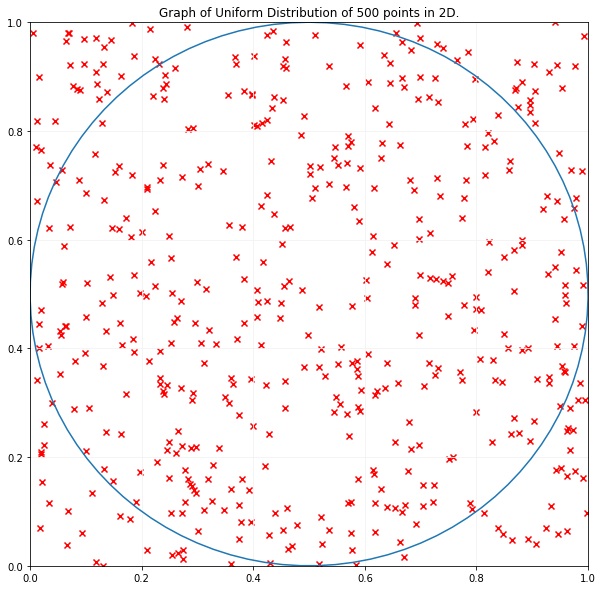

Pi = 3.128


In [47]:
# (A)

def inside(x,y):
    return ((x-0.5)**2+(y-0.5)**2)**0.5 < 0.5

seed(0)

num_trials = 500

x_vals = [ random() for k in range(num_trials) ]            
y_vals = [ random() for k in range(num_trials) ]  

# draw the circle using polar coordinates

x_angles = np.linspace(0,2*np.pi,100)            # returns a list of 100 equally-spaced values in the range [1..20]

X = [(np.sin(x)/2+0.5) for x in x_angles]
Y = [(np.cos(x)/2+0.5) for x in x_angles]


plt.figure(num=None, figsize=(10, 10))
plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 2D.',fontsize=12)
plt.grid(color='0.95')
plt.ylim(0, 1)
plt.xlim(0,1)
plt.scatter(x_vals, y_vals,marker="x",color="r")
plt.plot(X,Y)
count = 0
for k in range(num_trials):
    if inside(x_vals[k],y_vals[k]):
        count += 1
plt.show()

print("Pi = " + str(4*count/num_trials))

In [26]:
# (B)

#Solution that does not draw the diagram...

seed(0)     # this will ensure that your results will be consistent with my solution and everyone else's

def find_pi(num_trials):
    num_inside = 0
    for k in range(num_trials):
        x = random()
        y = random()
        if ((x**2 + y**2) ** 0.5 <= 1.0):
            num_inside += 1
    return 4.0*num_inside / num_trials

for k in range(1,7):
    num_trials = 10**k
    print(num_trials, find_pi(num_trials))

10 2.8
100 3.32
1000 3.032
10000 3.1544
100000 3.13228
1000000 3.142204


In [41]:
# (C)

num_trials = 10**8
print("Pi = " + str(find_pi(num_trials)))

Pi = 3.14167324
